<a href="https://colab.research.google.com/github/LizaYemini/Pix2Pix_GAN_On_Statue/blob/main/Pix2Pix_GAN_On_Statue3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# check python version
!python --version

Python 3.7.10


# Preprocessing - get the data and ready it

Please follow the steps below to download and use kaggle data within Google Colab:

1. Go to your account:https://www.kaggle.com/username/account , Scroll to API section and Click Expire API Token to remove previous tokens

2. Click on Create New API Token - It will download kaggle.json file on your machine.

In [3]:
! pip install -q kaggle

In [4]:
import os
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
 from google.colab import files
 #upload the api token (kaggle.json)
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lizayemini","key":"6b1752e2112d584eeb30860df31a018b"}'}

In [6]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              223KB  2021-04-08 06:45:48           2208  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44           1282  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            989  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19            465  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [7]:
!kaggle datasets download ytrivedi1/sculptures --force

 94% 186M/198M [00:02<00:00, 86.3MB/s]
100% 198M/198M [00:02<00:00, 94.6MB/s]


In [8]:
#Ay to get everything again
!unzip sculptures.zip

Archive:  sculptures.zip
  inflating: sculptureGas/test/101.jpg  
  inflating: sculptureGas/test/111.jpg  
  inflating: sculptureGas/test/113.jpg  
  inflating: sculptureGas/test/136.jpg  
  inflating: sculptureGas/test/146 18.59.45.jpg  
  inflating: sculptureGas/test/155.jpg  
  inflating: sculptureGas/test/18.jpg  
  inflating: sculptureGas/test/198.png  
  inflating: sculptureGas/test/199.jpg  
  inflating: sculptureGas/test/2.jpg  
  inflating: sculptureGas/test/215.jpg  
  inflating: sculptureGas/test/224.png  
  inflating: sculptureGas/test/241.jpg  
  inflating: sculptureGas/test/249.jpg  
  inflating: sculptureGas/test/251.jpg  
  inflating: sculptureGas/test/26.jpg  
  inflating: sculptureGas/test/27.jpg  
  inflating: sculptureGas/test/278.jpg  
  inflating: sculptureGas/test/288.jpeg  
  inflating: sculptureGas/test/290.jpg  
  inflating: sculptureGas/test/292.jpg  
  inflating: sculptureGas/test/294.jpg  
  inflating: sculptureGas/test/302.jpg  
  inflating: sculptureGas/t

In [9]:
def show(im):
  # show image
  plt.figure()
  plt.imshow(im)
  plt.show()

In [10]:
#create new folders
!mkdir data
#pic
!mkdir data/testB
#paint
!mkdir data/testA
#pic
!mkdir data/valB
#paint
!mkdir data/valA
#pic
!mkdir data/trainB
#paint
!mkdir data/trainA

In [11]:
def crop_all(org_dir, test_flag, limit, half_width=256):
  num_made = 0
  for dirname, _, filenames in os.walk('sculptureGas/' + org_dir):
      for filename in filenames:
          path = os.path.join(dirname, filename)
          name = os.path.splitext(filename)[0]
          img = Image.open(path)
          #split in two
          w, h = img.size
          #don't take it if sizes are less then 130x130
          if w < (half_width*2) or h < (half_width*2):
            continue
          #(left, top, right, bottom)
          pic = img.crop((1, 1, int(w/2), h))
          paint = img.crop((int(w/2), 1, w, h))
          # 1/5 to val, 4/5 for train
          if (not test_flag) and (limit % 5 == 0):
            newPathPic = 'data/' + 'valB' + '/' + name + '_pic' + '.png'
            newPathPaint = 'data/' + 'valA' + '/' + name + '_paint' + '.png'
          elif (not test_flag):
            newPathPic = 'data/' + 'trainB' + '/' + name + '_pic' + '.png'
            newPathPaint = 'data/' + 'trainA' + '/' + name + '_paint' + '.png'
          else:
            newPathPic = 'data/' + 'testB' + '/' + name + '_pic' + '.png'
            newPathPaint = 'data/' + 'testA' + '/' + name + '_paint' + '.png'
          pic.save(newPathPic)
          paint.save(newPathPaint)
          #imgPic = plt.imread(newPath)
          #show(imgPic)
 
          #crop to resize
          w, h = pic.size
          pic = pic.crop((int(w/2)-half_width, int(h/2)-half_width, int(w/2)+half_width, int(h/2)+half_width))
          pic = pic.convert('LA')
          #blw(pic) # convert image to black and white
          paint = paint.crop((int(w/2)-half_width, int(h/2)-half_width, int(w/2)+half_width, int(h/2)+half_width))
          pic.save(newPathPic)
          paint.save(newPathPaint)
          imgPic = plt.imread(newPathPic)
          #show(imgPic)
          imgPaint = plt.imread(newPathPaint)
          #show(imgPaint)
          num_made += 1
          if(limit != -1):
            limit -= 1
            if limit == 0:
              break
  print("number of examples made: ", num_made)

In [12]:
crop_all('test', True, -1, half_width = 128)   #65: 191, 70: 191, 256: 30.
crop_all('train', False, -1, half_width = 128) #65: 1737, 70: 1733, 256: 197. and val from 1/5 of the data

number of examples made:  190
number of examples made:  1689


In [13]:
def get_all(path, lst):
  for dirname, _, filenames in os.walk('path'):
      for filename in filenames:
          path = os.path.join(dirname, filename)
          lst.append()
          img = plt.imread(path)
          show(img)

now we have data folder and in it a test_paint, test_pic, train_paint, train_pic folders and in them the images are all 130X130 pxl.

In [14]:
#can be usefull
def image_to_tensor(image_numpy, max_size=400, shape=None):
  
  # crop image if image is too big
  if max(image_numpy.size) > max_size:
    size = max_size
  else:
    size = max(image_numpy.size)
	
  size = (size, int(1.5*size))
  # if shape is given use it
  if shape is not None:
    size = shape
  
  # resize and normalize the image
  in_transform = transforms.Compose([
    transforms.Resize(size),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
  
  image = in_transform(image_numpy)[:3, :, :].unsqueeze(0)
  
  return image

In [15]:
def tensor_to_numpy(image_tensor):
  image = image_tensor.to("cpu").clone().detach()
  image = image.numpy().squeeze()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
  image = image.clip(0, 1)
  
  return image

In [16]:
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed
# load all images in a directory into memory
def load_images(path_trainA, path_trainB, size=(256,256)):
  src_list, tar_list = list(), list()
  # enumerate filenames in directory, assume all are images
  for filename in listdir(path_trainA):
    # load and resize the image
    pixels1 = load_img(path_trainA + filename, target_size=size)
    pixels2 = load_img(path_trainB + filename.replace("paint","pic"), target_size=size)
    # convert to numpy array
    pixels1 = img_to_array(pixels1)
    pixels2 = img_to_array(pixels2)
    src_list.append(pixels1)
    tar_list.append(pixels2)
  return [asarray(src_list), asarray(tar_list)]

In [17]:
# dataset path
path_trainA = 'data/trainA/'
path_trainB = 'data/trainB/'
# load dataset
[src_images, tar_images] = load_images(path_trainA, path_trainB)
print('Loaded: ', src_images.shape, tar_images.shape)
# save as compressed numpy array
filename = 'statue_256.npz'
savez_compressed(filename, src_images, tar_images)
print('Saved dataset: ', filename)

Loaded:  (1689, 256, 256, 3) (1689, 256, 256, 3)
Saved dataset:  statue_256.npz


We can then plot some images pairs to confirm the data has been handled correctly

Loaded:  (1689, 256, 256, 3) (1689, 256, 256, 3)


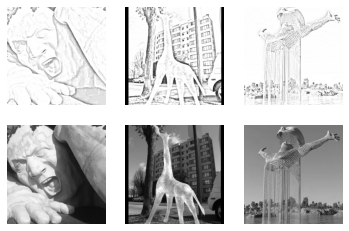

In [18]:
# load the prepared dataset
from numpy import load
from matplotlib import pyplot
# load the dataset
data = load('statue_256.npz')
src_images, tar_images = data['arr_0'], data['arr_1']
print('Loaded: ', src_images.shape, tar_images.shape)
# plot source images
n_samples = 3
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(src_images[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(tar_images[i].astype('uint8'))
pyplot.show()

# Discriminator Model




In [19]:
from numpy import load
from numpy import zeros
from numpy import ones
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from matplotlib import pyplot

def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_src_image = Input(shape=image_shape)
	# target image input
	in_target_image = Input(shape=image_shape)
	# concatenate images channel-wise
	merged = Concatenate()([in_src_image, in_target_image])
	# C64
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	patch_out = Activation('sigmoid')(d)
	# define model
	model = Model([in_src_image, in_target_image], patch_out)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
	return model

# Generator Model

In [20]:
# define an encoder block
def define_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g
 
# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g
 
# define the standalone generator model
def define_generator(image_shape=(130,130,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# encoder model
	e1 = define_encoder_block(in_image, 64, batchnorm=False)
	e2 = define_encoder_block(e1, 128)
	e3 = define_encoder_block(e2, 256)
	e4 = define_encoder_block(e3, 512)
	e5 = define_encoder_block(e4, 512)
	e6 = define_encoder_block(e5, 512)
	e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
	b = Activation('relu')(b)
	# decoder model
	d1 = decoder_block(b, e7, 512)
	d2 = decoder_block(d1, e6, 512)
	d3 = decoder_block(d2, e5, 512)
	d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(d4, e3, 256, dropout=False)
	d6 = decoder_block(d5, e2, 128, dropout=False)
	d7 = decoder_block(d6, e1, 64, dropout=False)
	# output
	g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model

# Combined generator and discriminator model

In [21]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model, image_shape):
	# make weights in the discriminator not trainable
	for layer in d_model.layers:
		if not isinstance(layer, BatchNormalization):
			layer.trainable = False
	# define the source image
	in_src = Input(shape=image_shape)
	# connect the source image to the generator input
	gen_out = g_model(in_src)
	# connect the source input and generator output to the discriminator input
	dis_out = d_model([in_src, gen_out])
	# src image as input, generated image and classification output
	model = Model(in_src, [dis_out, gen_out])
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
	return model

In [22]:
# load and prepare training images
def load_real_samples(filename):
	# load compressed arrays
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,130] to [-1,1]
	X1 = (X1 - 65) / 65
	X2 = (X2 - 65) / 65
	return [X1, X2]

In [23]:
# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
	# unpack dataset
	trainA, trainB = dataset
	# choose random instances
	ix = randint(0, trainA.shape[0], n_samples)
	# retrieve selected images
	X1, X2 = trainA[ix], trainB[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, patch_shape, patch_shape, 1))
	return [X1, X2], y

In [24]:
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):
	# generate fake instance
	X = g_model.predict(samples)
	# create 'fake' class labels (0)
	y = zeros((len(X), patch_shape, patch_shape, 1))
	return X, y

In [38]:
# generate samples and save as a plot and save the model
def summarize_performance(epoch, g_model, dataset, n_samples=5):
	# select a sample of input images
	[X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
	# generate a batch of fake samples
	X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
	# scale all pixels from [-1,1] to [0,1]
	X_realA = (X_realA + 1) / 2.0
	X_realB = (X_realB + 1) / 2.0
	X_fakeB = (X_fakeB + 1) / 2.0
	# plot real source images
	
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realA[i])
	pyplot.title('Sketch picture', loc="left")
	# plot generated target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples + i)
		pyplot.axis('off')
		pyplot.imshow(X_fakeB[i])
	pyplot.title('Generated sculpture picture', loc="left")
	# plot real target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples*2 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realB[i])
	pyplot.title('Real target sculpture picture', loc="left")
	# save plot to file
	filename1 = 'plot_%02d.png' % (epoch)
	pyplot.savefig(filename1)
	pyplot.show()
	pyplot.close()
	# save the generator model
	filename2 = 'model_%02d.h5' % (epoch)
	g_model.save(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))

# Train

In [39]:
# train pix2pix model
def train(d_model, g_model, gan_model, dataset, n_epochs=5, n_batch=1, device="cuda"):
    # Track loss history
	losses = []
	# determine the output square shape of the discriminator
	n_patch = d_model.output_shape[1]
	# unpack dataset
	trainA, trainB = dataset
	# calculate the number of batches per training epoch
	bat_per_epo = int(len(trainA) / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
    # print 3 times every epoch
	bat_print = bat_per_epo / 3
	# manually enumerate epochs
	for epoch in range(1, n_epochs + 1):
		print('Epoch %d: ' % epoch)
		for i in range(bat_per_epo):
			# select a batch of real samples
			[X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
			# generate a batch of fake samples
			X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
			# update discriminator for real samples
			d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
			# update discriminator for generated samples
			d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
			# update the generator
			g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
			# summarize performance
			if (i % bat_print == 0):
				print('>Batch %d, Disc Loss on real samples:[%.3f] Disc Loss on fake samples: [%.3f] Gen Loss:[%.3f]' % (i, d_loss1, d_loss2, g_loss))
		losses.append((d_loss1, d_loss2, g_loss))
		summarize_performance(epoch, g_model, dataset)
	#summarize_performance(n_epochs, g_model, dataset)
	return losses

Loaded (1689, 256, 256, 3) (1689, 256, 256, 3)
Epoch 1: 
>Batch 0, Disc Loss on real samples:[0.406] Disc Loss on fake samples: [0.716] Gen Loss:[204.287]
>Batch 563, Disc Loss on real samples:[1.015] Disc Loss on fake samples: [0.833] Gen Loss:[33.670]
>Batch 1126, Disc Loss on real samples:[0.003] Disc Loss on fake samples: [0.013] Gen Loss:[45.876]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

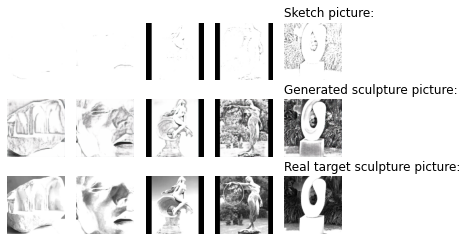

>Saved: plot_01.png and model_01.h5
Epoch 2: 
>Batch 0, Disc Loss on real samples:[0.003] Disc Loss on fake samples: [0.015] Gen Loss:[74.267]
>Batch 563, Disc Loss on real samples:[0.003] Disc Loss on fake samples: [0.016] Gen Loss:[44.703]
>Batch 1126, Disc Loss on real samples:[0.014] Disc Loss on fake samples: [0.017] Gen Loss:[41.734]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

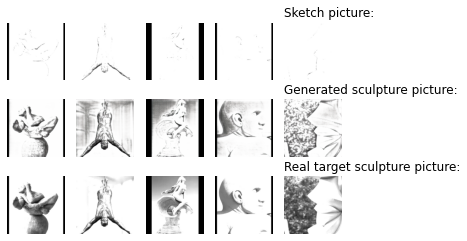

>Saved: plot_02.png and model_02.h5
Epoch 3: 
>Batch 0, Disc Loss on real samples:[0.006] Disc Loss on fake samples: [0.016] Gen Loss:[45.759]
>Batch 563, Disc Loss on real samples:[0.005] Disc Loss on fake samples: [0.018] Gen Loss:[65.787]
>Batch 1126, Disc Loss on real samples:[0.016] Disc Loss on fake samples: [0.034] Gen Loss:[51.357]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

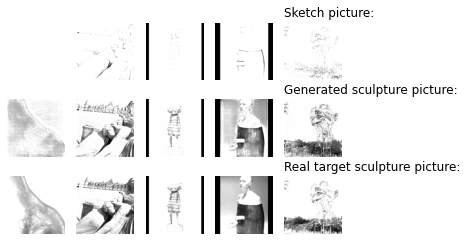

>Saved: plot_03.png and model_03.h5
Epoch 4: 
>Batch 0, Disc Loss on real samples:[0.007] Disc Loss on fake samples: [0.015] Gen Loss:[79.057]
>Batch 563, Disc Loss on real samples:[0.005] Disc Loss on fake samples: [0.015] Gen Loss:[85.042]
>Batch 1126, Disc Loss on real samples:[0.004] Disc Loss on fake samples: [0.011] Gen Loss:[56.454]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

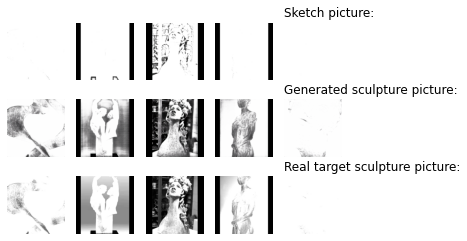

>Saved: plot_04.png and model_04.h5
Epoch 5: 
>Batch 0, Disc Loss on real samples:[0.002] Disc Loss on fake samples: [0.010] Gen Loss:[49.083]
>Batch 563, Disc Loss on real samples:[0.012] Disc Loss on fake samples: [0.007] Gen Loss:[75.216]
>Batch 1126, Disc Loss on real samples:[0.002] Disc Loss on fake samples: [0.008] Gen Loss:[51.624]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

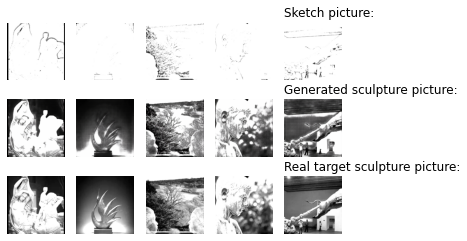

>Saved: plot_05.png and model_05.h5


In [40]:
# load image data
dataset = load_real_samples('statue_256.npz')
print('Loaded', dataset[0].shape, dataset[1].shape)
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
# define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)
# train model
loss_history = train(d_model, g_model, gan_model, dataset)

**Plot the loss as a function of #epochs:**

[[2.56893924e-03 1.13464370e-02 5.93379250e+01]
 [6.33340701e-03 2.66370121e-02 4.49986839e+01]
 [7.39080971e-03 1.45485615e-02 5.14950142e+01]
 [2.61842133e-03 1.07920859e-02 4.98451920e+01]
 [2.19457503e-03 9.07975622e-03 6.29144173e+01]]


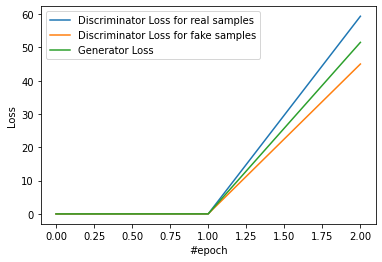

In [41]:
import numpy as np
loss_history = np.array(loss_history)
print(loss_history)
plt.plot(loss_history[0], label='Discriminator Loss for real samples')
plt.plot(loss_history[1], label='Discriminator Loss for fake samples')
plt.plot(loss_history[2], label='Generator Loss')
plt.ylabel("Loss")
plt.xlabel("#epoch")
plt.legend()